# Big Data y Machine Learning (UBA) 2025
## Clase 10 - Regresion lineal

**Objetivo:** Correr regresiones lineales. Estimar polinomios y encontrar el ECM.

Veremos:
- Regresión lineal simple y múltiple
- Estadísticas (similares a stata o R) con nuevo módulo 
- Encontrar el ECM

In [ ]:
# Instalar modulo de statsmodels 
# !pip install statsmodels

In [1]:
# Importamos paquetes
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import statsmodels.api as sm
import matplotlib.pyplot as plt

## Regresión Simple
Sea el modelo de regresión simple con un predictores ($p=1$):
$$
y_i = \beta_0 + \beta_1 \times x_{1i}  + \epsilon
$$
donde $\epsilon$ es el error no sistemático del modelo.

In [3]:
# Creamos unos datos de ejemplo
x = np.array([5, 15, 25, 35, 45, 55]) # Predictor
y = np.array([5, 20, 14, 32, 22, 38]) # Variable de interés a predecir

print(x)
print(y)
# Ambos son vectores fila

[ 5 15 25 35 45 55]
[ 5 20 14 32 22 38]


In [5]:
# Repasamos el Reshape para transformar x en un vector columna
x = x.reshape((-1, 1))   # El -1 indica el largo del array
# Es equivalente a: x = x.reshape((6, 1))

print(x)
print(y)

[[ 5]
 [15]
 [25]
 [35]
 [45]
 [55]]
[ 5 20 14 32 22 38]


#### Regresión lineal con skit-learn
Ahora utilizaremos la función [LinearRegression()](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) del paquete scikit-learn.
    
Se pueden proveer muchos parámetros opcionales para esta función:

- **fit_intercept**: Booleano que decide si calcular el intercepto (True) o considerarlo igual a cero (False) ($\beta_0$). Por default es True.
- **normalize**: Booleano que decide si normalizar las variables input (True) o no (False). Es False por default.
- **copy_X**: Booleano que decide si copiar (True) o sobreescribir las variables input (False). Es True por default.

In [9]:
# Primero, estimar el modelo. Lo hacemos con fit():
model = LinearRegression().fit(x, y)

In [11]:
# Veamos ahora los resultados por MCO

# El intercepto
intercepto = model.intercept_
print('\nIntercepto:', intercepto)

# La pendiente
pendiente = model.coef_
print('\nPendiente:', pendiente)



Intercepto: 5.633333333333329

Pendiente: [0.54]


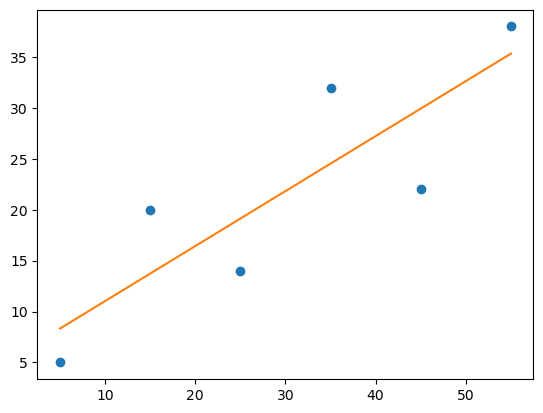

In [13]:
# Hacemos un scatter plot
plt.plot(x, y, 'o')
plt.plot(x, pendiente*x + intercepto)


Supongamos que ahora queremos predecir con este modelo $\hat{Y}$. Para ellos, usamos la funcion de `.predict()`y los valores del regresor en el modelo estimado y obtenemos la correspondiente respuesta predicha $\hat{Y}$.

In [17]:
# Predicción Y_hat
y_pred = model.predict(x)
print('Respuesta predicha:\n', y_pred)

# Recordemos cómo era nuestro vector y
print('\nEl vector de y:', y)

# Recordemos cómo era nuestro vector x
print('\nEl vector de x:', x)

Respuesta predicha:
 [ 8.33333333 13.73333333 19.13333333 24.53333333 29.93333333 35.33333333]

El vector de y: [ 5 20 14 32 22 38]

El vector de x: [[ 5]
 [15]
 [25]
 [35]
 [45]
 [55]]


### Precisión del modelo
Recordamos que definimos el $R^2$ como:
$$
R^2 = \frac{TSS-RSS}{TSS} = 1- \frac{RSS}{TSS}
$$
donde $TSS= \Sigma (y_i - \bar{y} )^2$ y $RSS=\Sigma (y_i - \hat{y} )^2$

In [19]:
# Calculamos el R2 (Alternativa 1)
r2 = model.score(x, y)
print('Coeficiente de determinación:', r2)

# Con la y predicha podemos calcular el R^2 de esta otra forma (Alternativa 2)
r2_new = r2_score(y, y_pred)
print("\nResultado alternativo para R2:", r2_new)

Coeficiente de determinación: 0.7158756137479542

Resultado alternativo para R2: 0.7158756137479542


#### Predicción Afuera de la Muestra
Supongamos tenemos nuevos datos y queremos ver qué tan buenos somos para predecir con los nuevos datos

In [21]:
# Si quiero probar valores nuevos de x (no los que usé para estimar el modelo):
x_new = np.arange(start=10, stop=20, step=2).reshape((-1, 1))   # Generamos valores entre [10, 20), con saltos de 2 en 2
print(x_new)

y_pred_new = model.predict(x_new)
print('\nNueva respuesta predicha:\n', y_pred_new)

[[10]
 [12]
 [14]
 [16]
 [18]]

Nueva respuesta predicha:
 [11.03333333 12.11333333 13.19333333 14.27333333 15.35333333]


## Regresión Multiple
Sea el modelo de regresión múltiple con dos predictores ($p=2$):
$$
y_i = \beta_0 + \beta_1 \times x_{1i} + + \beta_2 \times x_{2i} + \epsilon
$$

In [25]:
# Armamos un vector para la variable dependiente y una matriz de regresores:
x = np.array([[0, 1], [5, 1], [15, 2], [25, 5], [35, 11], [45, 15], [55, 34], [60, 35]])

y =  np.array([4, 5, 20, 14, 32, 22, 38, 43])

print(x)
print(y)


[[ 0  1]
 [ 5  1]
 [15  2]
 [25  5]
 [35 11]
 [45 15]
 [55 34]
 [60 35]]
[ 4  5 20 14 32 22 38 43]


In [27]:
# Estimamos el modelo
model = LinearRegression().fit(x, y)
r2 = model.score(x, y)

# Miramos resultados
print('Coeficiente de determinación:', r2)
print('\nIntercepto:', model.intercept_)
print('\nCoeficientes:', model.coef_)

Coeficiente de determinación: 0.8615939258756775

Intercepto: 5.52257927519819

Coeficientes: [0.44706965 0.25502548]


In [29]:
# Vemos la respuesta predicha para los valores originales de los regresores
y_pred = model.predict(x)
print('Respuesta predicha:', y_pred, sep='\n')

Respuesta predicha:
[ 5.77760476  8.012953   12.73867497 17.9744479  23.97529728 29.4660957
 38.78227633 41.27265006]


In [31]:
# Vemos la predicción para nuevos valores de X
x_new = np.arange(start=1, stop=31, step=3).reshape((-1, 2))   # Matriz con 2 columnas y tantas filas como tenga el array
print(x_new)
y_new = model.predict(x_new)
print('Nueva respuesta predicha:', y_new, sep='\n')

[[ 1  4]
 [ 7 10]
 [13 16]
 [19 22]
 [25 28]]
Nueva respuesta predicha:
[ 6.98975085 11.20232163 15.41489241 19.62746319 23.84003398]


### Imitando a Stata con statsmodels

[statsmodels](https://www.statsmodels.org/stable/index.html) proporciona clases y funciones para la estimación de modelos estadísticos, para realizar pruebas estadísticas y para explorar datos estadísticos.

In [33]:
x = [[0, 1], [5, 1], [15, 2], [25, 5], [35, 11], [45, 15], [55, 34], [60, 35]]
y = [4, 5, 20, 14, 32, 22, 38, 43]
x, y = np.array(x), np.array(y)

x = sm.add_constant(x)
print(x)
print(y)

[[ 1.  0.  1.]
 [ 1.  5.  1.]
 [ 1. 15.  2.]
 [ 1. 25.  5.]
 [ 1. 35. 11.]
 [ 1. 45. 15.]
 [ 1. 55. 34.]
 [ 1. 60. 35.]]
[ 4  5 20 14 32 22 38 43]


In [35]:
# Especificamos el modelo
model = sm.OLS(y, x)
# Ajustamos el modelo
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     15.56
Date:                Tue, 22 Apr 2025   Prob (F-statistic):            0.00713
Time:                        18:30:21   Log-Likelihood:                -24.316
No. Observations:                   8   AIC:                             54.63
Df Residuals:                       5   BIC:                             54.87
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.5226      4.431      1.246      0.2

/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [ ]:
# Si solo queremos ver los coeficientes
print(results.params)

In [ ]:
# También lo podemos imprimir los resultados para un excel
print(results.summary().as_csv())

Se puede obtener la respuesta predicha con los valores de x para estimar el modelo con `.predict()` o `.fittedvalues`:

In [ ]:
print('predicted response:\n', results.predict(x)) 

In [ ]:
print('predicted response:\n', results.fittedvalues) #equivalente: results.predict(x)

##     ERROR CUADRÁTICO MEDIO

Ahora veamos algunas métricas de evaluación usuales para los problemas de regresión en Machine Learning.

Vamos a observar los valores de las siguientes métricas:

**Error Cuadrático Medio / Mean Squared Error**

$MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{f}(x_i))^2$

**Raíz del Error Cuadrático Medio / Root Mean Squared Error**

$RMSE = \sqrt{MSE}$

**Error Absoluto Medio / Mean Absolute Error**

$MAE = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{f}(x_i)|$


In [ ]:
# Generamos un dataset aleatorio
np.random.seed(0)
x = np.random.rand(100)  # Array de la forma (100, 1) con nros aleatorios entre [0, 1) de una distribución uniforme
epsilon = np.random.normal(0,1,100) # error no sistematico

y = 2 + 3*x + epsilon
print("x:\n", x)
print("y:\n", y)
print("epsilon:\n", epsilon)

In [ ]:
print("Forma de x:", x.shape)
print("Forma de y:", y.shape)

print("Dimensiones de x:", x.ndim)
print("Dimensiones de y:", y.ndim)

In [ ]:
# Graficamos
plt.scatter(x, y, s=10)  # s indica el tamaño de los puntos del scatter.
plt.plot(x, 2+3*x , color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
x_con = sm.add_constant(x)
model = sm.OLS(y, x_con)
results = model.fit()
print(results.summary())

In [ ]:
# Predecimos las y
y_pred = results.predict(x_con)
y_pred

print("Forma de y_pred:", y_pred.shape)
print("Dimensiones de y:", y_pred.ndim)

In [ ]:
# Graficamos
plt.scatter(x, y, s=10)  # s indica el tamaño de los puntos del scatter.
plt.plot(x, 2+3*x, color='red')
plt.plot(x, y_pred, color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#### MSE con datos de entrenamiento (dentro de la muestra)

In [ ]:
# Usando MSE de scikit-learn
mse1 = mean_squared_error(y, y_pred)
print(mse1)

# Usando la formula manualmente
mse2 = np.square(np.subtract(y, y_pred)).mean()
print(mse2)

In [ ]:
# También podemos ver el RMSE y el MAE
rmse = np.sqrt(mean_squared_error(y, y_pred))
print(rmse)
mae = mean_absolute_error(y, y_pred)
print(mae)

### MSE con datos de testeo (afuera de la muestra)


In [ ]:
# Generamos un nuevo dataset aleatorio para testear nuestor modelo estimado
np.random.seed(0)
x_new = np.random.rand(10)  # Array de la forma (100, 1) con nros aleatorios entre [0, 1) de una distribución uniforme
epsilon_new = np.random.normal(0,1,10) # error no sistematico

y_new = 2 + 3*x_new + epsilon_new
print("x:\n", x_new)
print("y:\n", y_new)
print("epsilon:\n", epsilon_new)

In [ ]:
# Nueva Predeccion las y
x_new_con = sm.add_constant(x_new) # agregamos constante
y_pred_new = results.predict(x_new_con)

print("Forma de y_pred:", y_pred_new.shape)
print("Dimensiones de y:", y_pred_new.ndim)

Ahora si veamos la predicción afuera de la muestra



In [ ]:
# Usando MSE testeo de scikit-learn
mse_test = mean_squared_error(y_new, y_pred_new)
print(mse_test)

In [ ]:
# También podemos ver el RMSE y el MAE
rmse_test = np.sqrt(mean_squared_error(y_new, y_pred_new))
print(rmse_test)
mae_test = mean_absolute_error(y_new, y_pred_new)
print(mae_test)